In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

Mounted at /content/drive


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tharushiwitharana
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs


100%|██████████| 740M/740M [00:24<00:00, 32.0MB/s]


In [ ]:
import os

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import os
import shutil
import random

def split_dataset(input_folder, output_train_folder, output_test_folder, split_ratio=0.8):
    # Create output folders if they don't exist
    os.makedirs(output_train_folder, exist_ok=True)
    os.makedirs(output_test_folder, exist_ok=True)

    # Iterate through each class folder in the input folder
    for class_folder in os.listdir(input_folder):
        class_path = os.path.join(input_folder, class_folder)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            random.shuffle(images)  # Shuffle images to ensure randomness
            split_index = int(len(images) * split_ratio)

            # Copy images to train folder
            for image in images[:split_index]:
                src = os.path.join(class_path, image)
                dst = os.path.join(output_train_folder, class_folder, image)
                os.makedirs(os.path.dirname(dst), exist_ok=True)
                shutil.copy(src, dst)

            # Copy images to test folder
            for image in images[split_index:]:
                src = os.path.join(class_path, image)
                dst = os.path.join(output_test_folder, class_folder, image)
                os.makedirs(os.path.dirname(dst), exist_ok=True)
                shutil.copy(src, dst)

# Example usage
input_folder = "/content/identifying-disease-in-tea-leafs/tea sickness dataset" # Change this to the path of your dataset
output_train_folder = "/content/identifying-disease-in-tea-leaf/train"  # Change this to the desired train output folder
output_test_folder =  "/content/identifying-disease-in-tea-leaf/test"  # Change this to the desired test output folder

split_dataset(input_folder, output_train_folder, output_test_folder)


In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                   rotation_range=10, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True,
                                   vertical_flip=True, fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset = train_datagen.flow_from_directory(directory=output_train_folder,
                                                  target_size=(224, 224),
                                                  class_mode='categorical',
                                                  subset='training',
                                                  batch_size=32)
valid_dataset = train_datagen.flow_from_directory(directory=output_train_folder,
                                                  target_size=(224, 224),
                                                  class_mode='categorical',
                                                  subset='validation',
                                                  batch_size=32)
test_dataset = test_datagen.flow_from_directory(directory=output_test_folder,
                                                target_size=(224, 224),
                                                class_mode='categorical',
                                                batch_size=32)


Found 567 images belonging to 8 classes.
Found 139 images belonging to 8 classes.
Found 179 images belonging to 8 classes.


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
train_samples, train_labels = train_dataset.next()
valid_samples, valid_labels = valid_dataset.next()
test_samples, test_labels = test_dataset.next()

In [ ]:

train_samples_flat = train_samples.reshape(train_samples.shape[0], -1)
valid_samples_flat = valid_samples.reshape(valid_samples.shape[0], -1)
test_samples_flat = test_samples.reshape(test_samples.shape[0], -1)


In [ ]:

# Train the KNN model
knn_model.fit(train_samples_flat, np.argmax(train_labels, axis=1))


KNeighborsClassifier()

In [ ]:
# Evaluate the model
train_pred = knn_model.predict(train_samples_flat)
valid_pred = knn_model.predict(valid_samples_flat)
test_pred = knn_model.predict(test_samples_flat)

In [ ]:
train_accuracy = accuracy_score(np.argmax(train_labels, axis=1), train_pred)
valid_accuracy = accuracy_score(np.argmax(valid_labels, axis=1), valid_pred)
test_accuracy = accuracy_score(np.argmax(test_labels, axis=1), test_pred)

In [ ]:

train_cm = confusion_matrix(np.argmax(train_labels, axis=1), train_pred)
valid_cm = confusion_matrix(np.argmax(valid_labels, axis=1), valid_pred)
test_cm = confusion_matrix(np.argmax(test_labels, axis=1), test_pred)

In [ ]:
# Print evaluation metrics
print('Train Accuracy:', train_accuracy)
print('Valid Accuracy:', valid_accuracy)
print('Test Accuracy:', test_accuracy)
print('Train Confusion Matrix:\n', train_cm)
print('Valid Confusion Matrix:\n', valid_cm)
print('Test Confusion Matrix:\n', test_cm)

Train Accuracy: 0.5625
Valid Accuracy: 0.15625
Test Accuracy: 0.3125
Train Confusion Matrix:
 [[0 0 1 0 0 0 0 0]
 [0 1 0 0 0 1 1 0]
 [0 0 7 0 0 0 0 0]
 [0 1 0 0 0 0 1 1]
 [0 0 3 0 1 0 0 0]
 [0 1 0 0 0 1 0 0]
 [0 2 0 0 0 0 7 0]
 [0 0 0 0 0 0 2 1]]
Valid Confusion Matrix:
 [[0 0 2 0 1 0 0 1]
 [0 0 0 1 1 0 4 0]
 [0 0 3 0 0 0 1 0]
 [0 1 0 0 0 0 2 0]
 [0 0 1 0 1 0 1 0]
 [0 2 0 0 0 0 0 0]
 [0 2 0 1 0 0 1 0]
 [0 1 0 1 0 0 4 0]]
Test Confusion Matrix:
 [[0 0 6 0 0 0 1 0]
 [0 1 0 1 0 0 0 1]
 [0 0 3 0 0 0 1 0]
 [0 2 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 1 0 0 0 0 5 0]
 [0 1 0 3 0 0 2 0]]


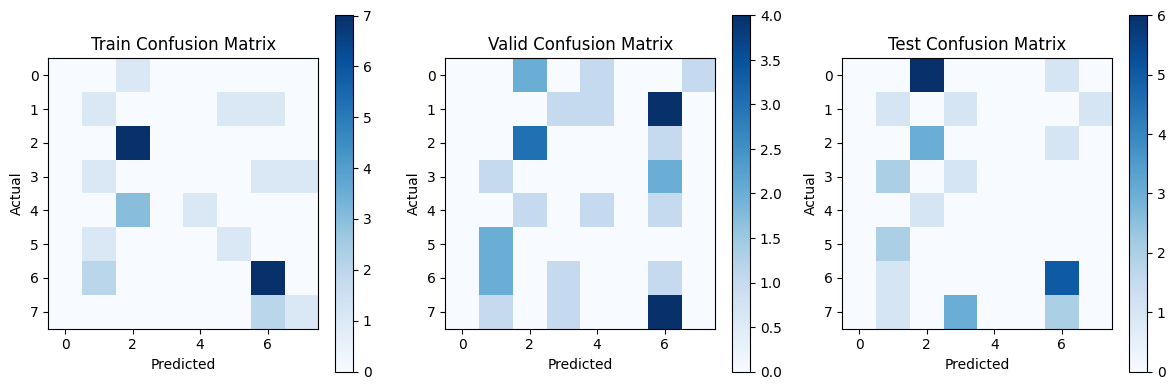

In [ ]:

# Plot confusion matrices
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Train Confusion Matrix')
plt.imshow(train_cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
plt.title('Valid Confusion Matrix')
plt.imshow(valid_cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
plt.title('Test Confusion Matrix')
plt.imshow(test_cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()